# TM10007 Assignment

In [1]:
# Run this to use from colab environment
!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 32.4 MB/s eta 0:00:00


## Import packages

In [2]:
import pandas as pd

from worcgist.load_data import load_data

## 1. Data loading

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [3]:
# Load data
data = load_data()

data['label'] = data['label'].map({'non-GIST': 0, 'GIST': 1})

y = data['label']
x = data.drop(columns=['label'])

# Calculate basic statistics
n_samples = len(y)
n_features = len(x.columns)

n_missing = data.isna().sum().sum()
n_zero = (data == 0).sum().sum()

n_non_gist = (y == 0).sum().sum()
n_gist = (y == 1).sum().sum()
# Print basic statistics
print(f'The number of samples: {n_samples}')
print(f'The number of features: {n_features}')
print(f'The number of datapoints: {n_samples * n_features}')
print(f"The number of missing values: {n_missing}")
print(f"The number of zero values: {n_zero}")
print(f"The percentage of zero values: {n_non_gist/(n_samples*n_features)*100} %")
print(f"The percentage of GIST tumors: {n_gist/n_samples*100} %")
print(f"The percentage of non-GIST tumors: {n_non_gist/n_samples*100} %")
#data.info()
#data.describe()
#data.duplicated()

The number of samples: 246
The number of features: 493
The number of datapoints: 121278
The number of missing values: 0
The number of zero values: 6848
The percentage of zero values: 0.0997707745840136 %
The percentage of GIST tumors: 50.81300813008131 %
The percentage of non-GIST tumors: 49.1869918699187 %


## 2. Pre-processing

### Replace missing values

In [4]:
x_no_missing_data = x.fillna(x.median()) # replace missing values in column with median value
print(f"Name of data without missing data = x_no_missing_data")
print(f'Shape of x_no_missing_data: {x_no_missing_data.shape}')

Name of data without missing data = x_no_missing_data
Shape of x_no_missing_data: (246, 493)


### Remove constants

In [15]:
# Remove columns with constant values
constant_cols = x_no_missing_data.columns[x_no_missing_data.nunique() <= 1] # get columns with 1 unique value or all values NaN

x_no_constant = x_no_missing_data.drop(columns=constant_cols) # drop these columns

# Remove rows with constant values
constant_rows = x_no_constant.index[x_no_constant.nunique(axis=1) <= 1] # get rows with 1 unique value or all values NaN
x_clean = x_no_constant.drop(index=constant_rows) # drop these columns

# Adjust y to match the remaining samples/rows in x_clean
y_clean = y.drop(index=constant_rows)

# Combine x_clean and y_clean to one DataFrame
data_constants_removed = pd.concat([x_clean, y_clean], axis=1)

# Get dimensions
dimensions_data_constants_removed = data_constants_removed.shape
n_samples_constants_removed, n_features_constants_removed = dimensions_data_constants_removed

# Change in dimension
samples_removed = n_samples - n_samples_constants_removed
features_removed = n_features - n_features_constants_removed

# Result
print(f"Name of data without columns and rows containing constant values = data_constants_removed")
print(f'Shape of data_constants_removed: {data_constants_removed.shape}')
print(f'Number of removed samples: {samples_removed}')
print(f'Number of removed features: {features_removed}')
data_constants_removed.head()

Index(['PREDICT_original_tf_LBP_max_R3_P12',
       'PREDICT_original_tf_LBP_peak_R3_P12',
       'PREDICT_original_tf_LBP_peak_position_R3_P12',
       'PREDICT_original_tf_LBP_max_R8_P24',
       'PREDICT_original_tf_LBP_peak_position_R8_P24',
       'PREDICT_original_tf_LBP_max_R15_P36',
       'PREDICT_original_tf_LBP_peak_position_R15_P36',
       'PREDICT_original_phasef_phasecong_min_WL3_N5',
       'PREDICT_original_phasef_phasecong_peak_WL3_N5',
       'PREDICT_original_phasef_phasecong_peak_position_WL3_N5',
       'PREDICT_original_phasef_phasesym_min_WL3_N5',
       'PREDICT_original_phasef_phasesym_peak_WL3_N5',
       'PREDICT_original_phasef_phasesym_peak_position_WL3_N5'],
      dtype='object')
Name of data without columns and rows containing constant values = data_constants_removed
Shape of data_constants_removed: (246, 481)
Number of removed samples: 0
Number of removed features: 12


,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_mean_WL3_N5,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5,label
ID,,,,,,,,,,,,,,,,,,,,,
GIST-001_0,0.797427,0.120594,80.192445,9.445741,7.102210,3.876595,0.927623,0.081385,0.015227,0.010465,...,0.005697,0.0,0.032461,7.353902,63.183181,0.123189,1591.133826,0.0,15.687095,1
GIST-002_0,0.896991,0.045854,35.323607,2.781343,5.339906,1.923100,0.975762,0.017550,0.009118,0.009385,...,0.009552,0.0,0.043431,6.452863,52.634005,0.172040,220.543010,0.0,12.664845,0
GIST-003_0,0.893238,0.051894,17.582541,1.864908,7.622507,1.039745,0.979608,0.017926,0.013258,0.010217,...,0.022104,0.0,0.068175,3.849719,16.277217,0.286710,62.150817,0.0,10.432943,1
GIST-004_0,0.914027,0.032078,21.951056,2.188093,4.757274,1.786309,0.981125,0.013734,0.011338,0.005147,...,0.010130,0.0,0.044148,5.725807,38.600415,0.182812,39.375540,0.0,10.194878,0
GIST-005_0,0.659747,0.266226,20.801224,4.025831,14.404912,7.695865,0.865275,0.171213,0.048078,0.047425,...,0.012287,0.0,0.043369,4.546357,23.831176,0.183349,24.192700,0.0,10.066832,0


### Normal distribution check

In [6]:
from scipy.stats import shapiro

# Shapiro-Wilk test on every column of x_final. Reject
alpha = 0.05  # Sets significance level
normal_results = {}  # Dictionary to store test results per feature

for col in x_clean.columns:
    p_value = shapiro(x_clean[col])[1]  # [1] gets p-value of tuple (statistic, p-value)
    normal_results[col] = p_value > alpha  # True = normal distribution

# Convert result to data frame (one row with feature column names and values true or false)
normality_df = pd.DataFrame([normal_results])

# Result
print(normality_df)

   PREDICT_original_sf_compactness_avg_2.5D  \
0                                     False   

   PREDICT_original_sf_compactness_std_2.5D  \
0                                     False   

   PREDICT_original_sf_rad_dist_avg_2.5D  \
0                                  False   

   PREDICT_original_sf_rad_dist_std_2.5D  \
0                                  False   

   PREDICT_original_sf_roughness_avg_2.5D  \
0                                   False   

   PREDICT_original_sf_roughness_std_2.5D  \
0                                   False   

   PREDICT_original_sf_convexity_avg_2.5D  \
0                                   False   

   PREDICT_original_sf_convexity_std_2.5D  PREDICT_original_sf_cvar_avg_2.5D  \
0                                   False                              False   

   PREDICT_original_sf_cvar_std_2.5D  ...  \
0                              False  ...   

   PREDICT_original_phasef_phasesym_max_WL3_N5  \
0                                        False   

   PRE

### Replace Outliers

In [7]:
# Set thresholds for outlier detection
threshold_nd = 1   # z-score threshold for normally distributed data
threshold_nnd = 5  # IQR threshold for non-normally distributed data
outliers_list = []  # Empty list to store original outliers values

# To not overwrite x_clean, make copy of x_clean, data without constant columns and rows, and without "label" column.
df_no_outliers = x_clean.astype(float).copy()  # Convert to float to prevent FutureWarnings

# From normality_df, get Series with column names as index and True/False as values
is_normal = normality_df.loc[0]

# Loop through all columns (features)
for column in df_no_outliers.columns:
    if is_normal[column]:
        # Normally distributed columns: z-score method
        # Determine interval boundaries
        mean = df_no_outliers[column].mean()
        std = df_no_outliers[column].std()
        lower_bound = mean - threshold_nd * std
        upper_bound = mean + threshold_nd * std  # All values outside this interval are considered outliers
        outliers = (df_no_outliers[column] < lower_bound) | (df_no_outliers[column] > upper_bound)  # Determine outliers
        outliers_list.extend(df_no_outliers.loc[outliers, column].tolist())  # Save outliers in outliers_list
        df_no_outliers.loc[df_no_outliers[column] > upper_bound, column] = upper_bound  # Replace outliers > upper boundary value with upper boundary value
        df_no_outliers.loc[df_no_outliers[column] < lower_bound, column] = lower_bound  # Replace outliers < lower boundary value with lower boundary value
    else:
        # Non-normally distributed columns: IQR-method
        # Determine interval boundaries
        Q1 = df_no_outliers[column].quantile(0.25)  # 25% of data values are less than or equal to Q1
        Q3 = df_no_outliers[column].quantile(0.75)  # 75% of data values are less than or equal to Q3
        IQR = Q3 - Q1
        lower_bound = Q1 - threshold_nnd * IQR
        upper_bound = Q3 + threshold_nnd * IQR
        outliers = (df_no_outliers[column] > upper_bound) | (df_no_outliers[column] < lower_bound)  # Determine outliers
        outliers_list.extend(df_no_outliers.loc[outliers, column].tolist())  # Save outliers in outliers_list
        df_no_outliers.loc[df_no_outliers[column] > upper_bound, column] = upper_bound  # Replace outliers > upper boundary value with upper boundary value
        df_no_outliers.loc[df_no_outliers[column] < lower_bound, column] = lower_bound  # Replace outliers < lower boundary value with lower boundary value

# Combine df_no_outliers and y_clean (labels) to one DataFrame
data_no_outliers = pd.concat([df_no_outliers, y_clean], axis=1)

# Result
print(f"Name of data without outliers = data_no_outliers")
print(f'Shape of data_no_outliers: {data_no_outliers.shape}')
print("Number of outliers:", len(outliers_list))
data_no_outliers.head()

Name of data without outliers = data_no_outliers
Shape of data_no_outliers: (246, 481)
Number of outliers: 5011


,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_mean_WL3_N5,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5,label
ID,,,,,,,,,,,,,,,,,,,,,
GIST-001_0,0.797427,0.120594,80.192445,9.445741,7.102210,3.876595,0.927623,0.081385,0.015227,0.010465,...,0.005697,0.0,0.032461,7.353902,63.183181,0.123189,1591.133826,0.0,13.954155,1
GIST-002_0,0.896991,0.045854,35.323607,2.781343,5.339906,1.923100,0.975762,0.017550,0.009118,0.009385,...,0.009552,0.0,0.043431,6.452863,52.634005,0.172040,220.543010,0.0,12.664845,0
GIST-003_0,0.893238,0.051894,17.582541,1.864908,7.622507,1.039745,0.979608,0.017926,0.013258,0.010217,...,0.022104,0.0,0.068175,3.849719,16.277217,0.286710,62.150817,0.0,10.432943,1
GIST-004_0,0.914027,0.032078,21.951056,2.188093,4.757274,1.786309,0.981125,0.013734,0.011338,0.005147,...,0.010130,0.0,0.044148,5.725807,38.600415,0.182812,39.375540,0.0,10.194878,0
GIST-005_0,0.659747,0.266226,20.801224,4.025831,14.404912,7.695865,0.865275,0.171213,0.048078,0.047425,...,0.012287,0.0,0.043369,4.546357,23.831176,0.183349,24.192700,0.0,10.066832,0


In [14]:
data_no_outliers.describe()

,PREDICT_original_sf_compactness_avg_2.5D,PREDICT_original_sf_compactness_std_2.5D,PREDICT_original_sf_rad_dist_avg_2.5D,PREDICT_original_sf_rad_dist_std_2.5D,PREDICT_original_sf_roughness_avg_2.5D,PREDICT_original_sf_roughness_std_2.5D,PREDICT_original_sf_convexity_avg_2.5D,PREDICT_original_sf_convexity_std_2.5D,PREDICT_original_sf_cvar_avg_2.5D,PREDICT_original_sf_cvar_std_2.5D,...,PREDICT_original_phasef_phasesym_mean_WL3_N5,PREDICT_original_phasef_phasesym_median_WL3_N5,PREDICT_original_phasef_phasesym_std_WL3_N5,PREDICT_original_phasef_phasesym_skewness_WL3_N5,PREDICT_original_phasef_phasesym_kurtosis_WL3_N5,PREDICT_original_phasef_phasesym_range_WL3_N5,PREDICT_original_phasef_phasesym_energy_WL3_N5,PREDICT_original_phasef_phasesym_quartile_range_WL3_N5,PREDICT_original_phasef_phasesym_entropy_WL3_N5,label
count,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,246.000000,...,246.000000,246.0,246.000000,246.000000,246.000000,246.000000,246.000000,246.0,246.000000,246.000000
mean,0.779416,0.108975,36.152504,5.263848,8.606899,4.529680,0.927252,0.066967,0.026524,0.016473,...,0.021767,0.0,0.056490,6.095769,58.936368,0.211277,352.636057,0.0,11.708519,0.508130
std,0.131634,0.073817,21.917044,3.890495,4.918973,4.441897,0.072312,0.067952,0.021328,0.011718,...,0.026983,0.0,0.034827,3.913188,74.987780,0.131835,521.691025,0.0,1.607976,0.500953
min,0.221607,0.007461,5.671578,0.840348,1.095668,0.266290,0.613411,0.000795,0.005627,0.002574,...,0.000091,0.0,0.002660,0.565312,-0.892914,0.000000,0.178485,0.0,9.448051,0.000000
25%,0.723176,0.049953,19.724433,2.429328,5.510853,1.904513,0.911940,0.020795,0.013228,0.008219,...,0.005477,0.0,0.031785,3.459787,13.547386,0.115066,41.273201,0.0,10.263131,0.000000
50%,0.822511,0.079085,30.208227,3.927282,7.587782,2.911236,0.954659,0.030969,0.020040,0.012305,...,0.011081,0.0,0.046375,5.450045,33.708014,0.196283,140.931159,0.0,11.654443,1.000000
75%,0.872778,0.162632,48.490763,7.165391,9.969727,5.506219,0.971646,0.107080,0.032157,0.022315,...,0.025694,0.0,0.072055,7.907432,77.595098,0.300694,409.189428,0.0,13.295127,1.000000
max,0.942817,0.328860,128.103705,21.266718,32.264093,23.514748,1.004350,0.313795,0.126802,0.059114,...,0.126779,0.0,0.179673,30.145659,397.833658,0.589061,2248.770563,0.0,13.954155,1.000000


## 3. Feature selection

## 4. Model training

### 4.1. Data splitting

In [9]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif
from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


# Splitting the data: 80% for training/validation, 20% for final testing.
X_train, X_test, y_train, y_test = train_test_split(
    data_no_outliers, y, test_size=0.2, stratify=y, random_state=42
)

# Define pipelines for each classifier.
pipeline_svm = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=50)),
    ('scaler', StandardScaler()),
    ('svm', SVC(probability=True, random_state=42))
])
pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier(random_state=42))
])
pipeline_dt = Pipeline([
    ('pca', PCA(n_components=10)),
    ('DT',DecisionTreeClassifier(random_state=42))
])
pipeline_knn = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=50)),
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])
pipeline_lr = Pipeline([
    ('feature_selection', SelectFromModel(LogisticRegression(solver='liblinear', penalty='l1'))),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])
pipeline_mlp = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=50)),
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(max_iter=1000, early_stopping=True, random_state=42))
])
pipeline_xgb = Pipeline([
    ('feature_selection', SelectKBest(score_func=f_classif, k=50)),
    ('XGB', XGBClassifier(random_state=42))])

# Define hyperparameter grids for the models.
param_range = [1, 2, 3, 4, 5, 6]
param_range_fl = [1.0, 0.5, 0.1]
n_estimators = [50,100,150]
learning_rates = [.1,.2,.3]

svm_param_grid = [{'svm__kernel': ['linear', 'rbf'],
                    'svm__C': param_range}]

rf_param_grid = [{'rf__min_samples_leaf': param_range,
                   'rf__max_depth': param_range,
                   'rf__min_samples_split': param_range[1:]}]

dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': param_range,
                   'DT__max_depth': param_range,
                   'DT__min_samples_split': param_range[1:]}]

knn_param_grid = [{'knn__n_neighbors': param_range,
                   'knn__weights': ['uniform', 'distance'],
                   'knn__metric': ['euclidean', 'manhattan']}]

lr_param_grid = [{'lr__penalty': ['l1', 'l2'],
                   'lr__C': param_range_fl,
                   'lr__solver': ['liblinear']}]

mlp_param_grid = [{'mlp__hidden_layer_sizes': [(50,), (100,), (100, 50)],
                   'mlp__activation': ['tanh', 'relu'],
                   'mlp__solver': ['adam'],
                   'mlp__alpha': [0.0001, 0.001],
                   'mlp__learning_rate': ['constant','adaptive']}]

xgb_param_grid = [{'XGB__learning_rate': learning_rates,
                    'XGB__max_depth': param_range,
                    'XGB__min_child_weight': param_range[:2],
                    'XGB__subsample': param_range_fl,
                    'XGB__n_estimators': n_estimators}]

# Setup grid search
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_grid_search = GridSearchCV(estimator=pipeline_svm,
        param_grid=svm_param_grid,
        scoring='accuracy',
        cv=cv)
rf_grid_search = GridSearchCV(estimator=pipeline_rf,
        param_grid=rf_param_grid,
        scoring='accuracy',
        cv=cv)
dt_grid_search = GridSearchCV(estimator=pipeline_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=cv)
knn_grid_search = GridSearchCV(estimator=pipeline_knn,
        param_grid=knn_param_grid,
        scoring='accuracy',
        cv=cv)
lr_grid_search = GridSearchCV(estimator=pipeline_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=cv)
mlp_grid_search = GridSearchCV(estimator=pipeline_mlp,
        param_grid=mlp_param_grid,
        scoring='accuracy',
        cv=cv)
xgb_grid_search = GridSearchCV(estimator=pipeline_xgb,
        param_grid=xgb_param_grid,
        scoring='accuracy',
        cv=cv)
grids = [svm_grid_search, rf_grid_search, dt_grid_search, knn_grid_search, lr_grid_search, mlp_grid_search, xgb_grid_search]

for pipe in grids:
    pipe.fit(X_train,y_train)


Streaminguitvoer ingekort tot de laatste 5000 regels.
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 76  82  86  88  92  93  97 104 106 315 328 408 415 416 421 428 429 434
 441 442 462 472 478 480] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 76  82  86  88  92  

In [10]:
grid_dict = {0: 'Support Vector Machine', 1: 'Random Forrest', 2: 'Decision Tree',
             3: 'K Nearest Neighbor', 4: 'Logistic Regression', 5: 'multi-layer perceptron',
             6: 'XGBoost'}
results_list = []

for i, model in enumerate(grids):
    model_name = grid_dict[i]
    accuracy = model.score(X_test, y_test)
    best_params = model.best_params_

    results_list.append({
        'Model': model_name,
        'Test Accuracy': accuracy,
        'Best Hyperparameters': best_params
    })

results_df = pd.DataFrame(results_list)
results_df.sort_values(by='Test Accuracy', ascending=False, inplace=True)

from IPython.display import display

pd.set_option('display.max_colwidth', 200)
display(results_df)

,Model,Test Accuracy,Best Hyperparameters
0,Support Vector Machine,1.00,"{'svm__C': 1, 'svm__kernel': 'linear'}"
6,XGBoost,1.00,"{'XGB__learning_rate': 0.1, 'XGB__max_depth': 1, 'XGB__min_child_weight': 1, 'XGB__n_estimators': 50, 'XGB__subsample': 1.0}"
4,Logistic Regression,1.00,"{'lr__C': 1.0, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}"
5,multi-layer perceptron,0.96,"{'mlp__activation': 'tanh', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (100, 50), 'mlp__learning_rate': 'constant', 'mlp__solver': 'adam'}"
1,Random Forrest,0.90,"{'rf__max_depth': 6, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2}"
3,K Nearest Neighbor,0.90,"{'knn__metric': 'euclidean', 'knn__n_neighbors': 4, 'knn__weights': 'distance'}"
2,Decision Tree,0.64,"{'DT__criterion': 'gini', 'DT__max_depth': 2, 'DT__min_samples_leaf': 3, 'DT__min_samples_split': 2}"


## 5. Model evaluation

In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score

best_model = grids[0].best_estimator_
y_pred = best_model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Precision: 1.0
Recall: 1.0
F1-score: 1.0


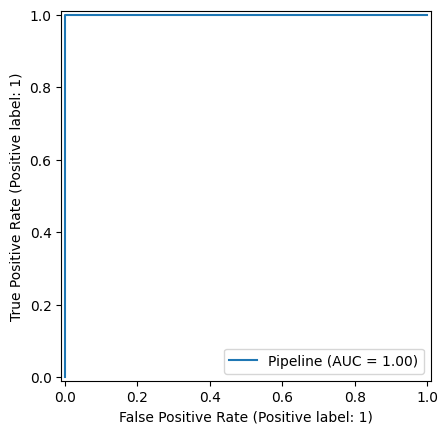

In [12]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay

y_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)

RocCurveDisplay.from_estimator(best_model, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 76  82  86  88  92  93  97 104 106 315 328 408 415 416 421 428 429 434
 441 442 462 472 478 480] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 76  82  86  88  92  93  97 104 106 315 328 408 415 416 421 428 429 434
 441 442 462 472 478 480] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklea

Text(0.5, 1.0, 'Learning Curve')

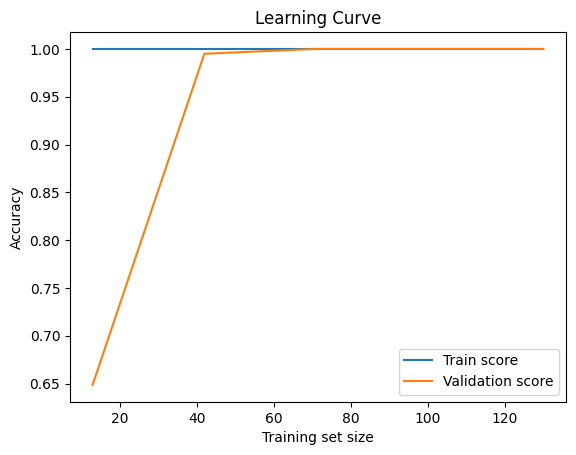

In [13]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=3, scoring='accuracy')

plt.plot(train_sizes, train_scores.mean(axis=1), label='Train score')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation score')
plt.legend()
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')